# 7. Betting Analysis

In this notebook, we're going to analyse the results of our betting simulator built in the last stage.
This will be useful to extract meaningful insights from the profits achieved.
We'll be able to find which matches give us the most benefit.

In order to make a realistic analysis, we'll use the bookmakers average odds per player

In [1]:
import pandas as pd

In [2]:
betting_df = pd.read_csv("csv/Betting_Data.csv")

We need to change the Date column data type to Date:

In [3]:
betting_df['Date'] = pd.to_datetime(betting_df['Date'])

In [10]:
def create_betting_history(betting_df, initial_bankroll, stake, value_threshold=0):
    
    history_df = betting_df.copy()
    
    bankroll = initial_bankroll
    won_bets = 0
    lost_bets = 0
    total_bets = 0
    for ix, row in betting_df.iterrows():
        if bankroll < 0: break
        
        value_on_p0 = row['Bet on Pl0 Value']
        value_on_p1 = row['Bet on Pl1 Value']
        winner = row["Winner"]
                    
        real_odds_p0 = row['Pl0 Avg odds']
        real_odds_p1 = row['Pl1 Avg odds'] 
        
        if pd.isna(real_odds_p0) or pd.isna(real_odds_p1): continue
        
        if value_on_p0 > value_threshold:
            history_df.loc[total_bets, 'Bet on Player:'] = 0
            history_df.loc[total_bets, 'Stake'] = stake
            history_df.loc[total_bets, 'Odds'] = real_odds_p0
            if winner == 0:
                bankroll += (real_odds_p0 - 1) * stake
                won_bets += 1
                history_df.loc[total_bets, 'Won'] = "YES"
                history_df.loc[total_bets, 'Profit'] = (real_odds_p0 - 1) * stake
            else:
                bankroll -= stake
                lost_bets += 1
                history_df.loc[total_bets, 'Won'] = "NO"
                history_df.loc[total_bets, 'Profit'] = stake * -1
            total_bets += 1
        
        if value_on_p1 > value_threshold:
            history_df.loc[total_bets, 'Bet on Player:'] = 1
            history_df.loc[total_bets, 'Stake'] = stake
            history_df.loc[total_bets, 'Odds'] = real_odds_p1
            if winner == 1:
                bankroll += (real_odds_p1 - 1) * stake
                won_bets += 1
                history_df.loc[total_bets, 'Won'] = "YES"
                history_df.loc[total_bets, 'Profit'] = (real_odds_p1 - 1) * stake
            else:
                bankroll -= stake
                lost_bets += 1
                history_df.loc[total_bets, 'Won'] = "NO"
                history_df.loc[total_bets, 'Profit'] = stake * -1
            total_bets += 1
    
    profit = round(bankroll - initial_bankroll,2)
    investment = total_bets*stake
    roi = round(100 * profit / investment, 2)
    print("Total bets placed: {}\nBets won: {}, bets lost: {}\nProfit: {}\nMoney invested: {}\nROI: {}%"
           .format(total_bets, won_bets, lost_bets, profit, investment, roi))
    
    return (history_df, roi)

Let's analyse the ROI differences year by year from 2010 to 2019.

In [5]:
"""
This function takes a betting dataframe in input, with a year parameter that's used to filter all matches in the dataframe
played in that year. If a second year is specified (year_end attribute), then the matches returned will be between the first
year parameter and the second year parameter included
"""
def bets_for_year(df, year, year_end=None):
    if year_end is not None:
        return df[(df['Date'] > pd.Timestamp(year-1,12,31)) & ((df['Date'] < pd.Timestamp(year_end,12,31)))].copy()
    else: return df[(df['Date'] > pd.Timestamp(year-1,12,31)) & ((df['Date'] < pd.Timestamp(year,12,31)))].copy()

+++++++++
Year 2010
Total bets placed: 1303
Bets won: 724, bets lost: 579
Profit: 136.93
Money invested: 1303
ROI: 10.51%
+++++++++
+++++++++
Year 2011
Total bets placed: 2024
Bets won: 1085, bets lost: 939
Profit: 119.67
Money invested: 2024
ROI: 5.91%
+++++++++
+++++++++
Year 2012
Total bets placed: 2046
Bets won: 1048, bets lost: 998
Profit: 149.67
Money invested: 2046
ROI: 7.32%
+++++++++
+++++++++
Year 2013
Total bets placed: 2019
Bets won: 1033, bets lost: 986
Profit: 151.09
Money invested: 2019
ROI: 7.48%
+++++++++
+++++++++
Year 2014
Total bets placed: 1931
Bets won: 1098, bets lost: 833
Profit: 266.09
Money invested: 1931
ROI: 13.78%
+++++++++
+++++++++
Year 2015
Total bets placed: 2038
Bets won: 1089, bets lost: 949
Profit: 156.08
Money invested: 2038
ROI: 7.66%
+++++++++
+++++++++
Year 2016
Total bets placed: 2033
Bets won: 1094, bets lost: 939
Profit: 329.04
Money invested: 2033
ROI: 16.18%
+++++++++
+++++++++
Year 2017
Total bets placed: 2081
Bets won: 1209, bets lost: 872

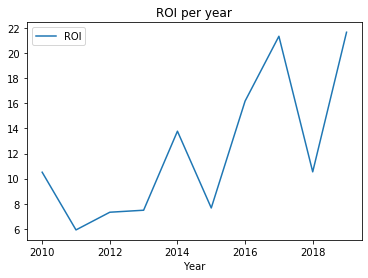

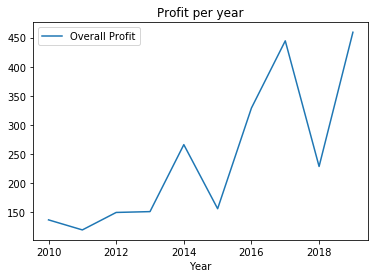

In [11]:
years_result_df_list = []
for y in range(2010,2020):
    print("+++++++++")
    print("Year {}".format(y))
    result = create_betting_history(bets_for_year(betting_df,y), 1000, 1)
    years_result_df_list.append({"Year":y, "ROI": result[1]})
    print("+++++++++")
result_df = pd.DataFrame(years_result_df_list)
result_df.plot.line(x='Year', y='ROI', title="ROI per year")